In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt

In [3]:
def moving_avg_fcst(dataset):
    dataset['predicted'] = dataset['runs_batsman'].rolling(window = 8).mean().shift(1)
    train, test = train_test_split(dataset, test_size = 0.3, random_state=42)
    r2 = r2_score(test[test['predicted'].notna() == True]['runs_batsman'], test[test['predicted'].notna() == True]['predicted'])
    mae = mean_absolute_error(test[test['predicted'].notna() == True]['runs_batsman'], test[test['predicted'].notna() == True]['predicted'])
    print("Moving average forecast r sq: ",round(r2*100,2),"%")
    print("Moving average forecast mae: ",round(mae,2))
    return(train, test)

In [35]:
def plot_fcst(train, test):
    train['predicted'] = np.nan
    plot_data = train.append(test)
    title = plot_data['batsman'][0]
    plot_data = plot_data.sort_values(['batsman', 'match_date','match_type'], ascending=[True, True, True])
    plot_data = plot_data.tail(50)
    plot_data.plot(x = "match_date", y = ["runs_batsman", "predicted"], kind="bar"
                   ,title = title, figsize = (16, 8), fontsize = 10, legend = True)
    plt.show()

In [36]:
def run_model(dataset):
    train, test = train_test_split(dataset, test_size = 0.3, random_state=42)
    
    train, test = moving_avg_fcst(dataset)

    plot_fcst(train, test)

In [37]:
player_1 = pd.read_csv("RG_Sharma.csv")

Moving average forecast r sq:  -20.23 %
Moving average forecast mae:  28.15


/Users/z001t72/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


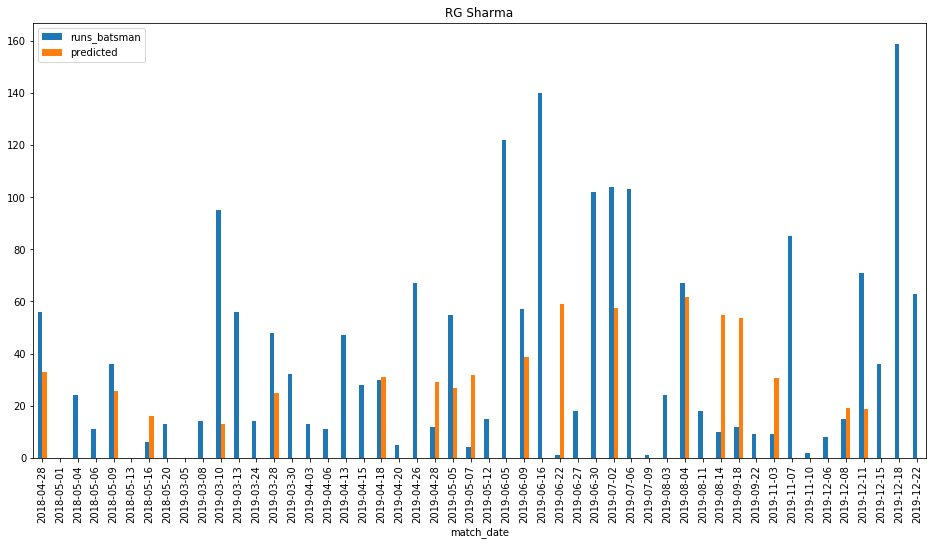

In [38]:
run_model(player_1)